In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

In [5]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

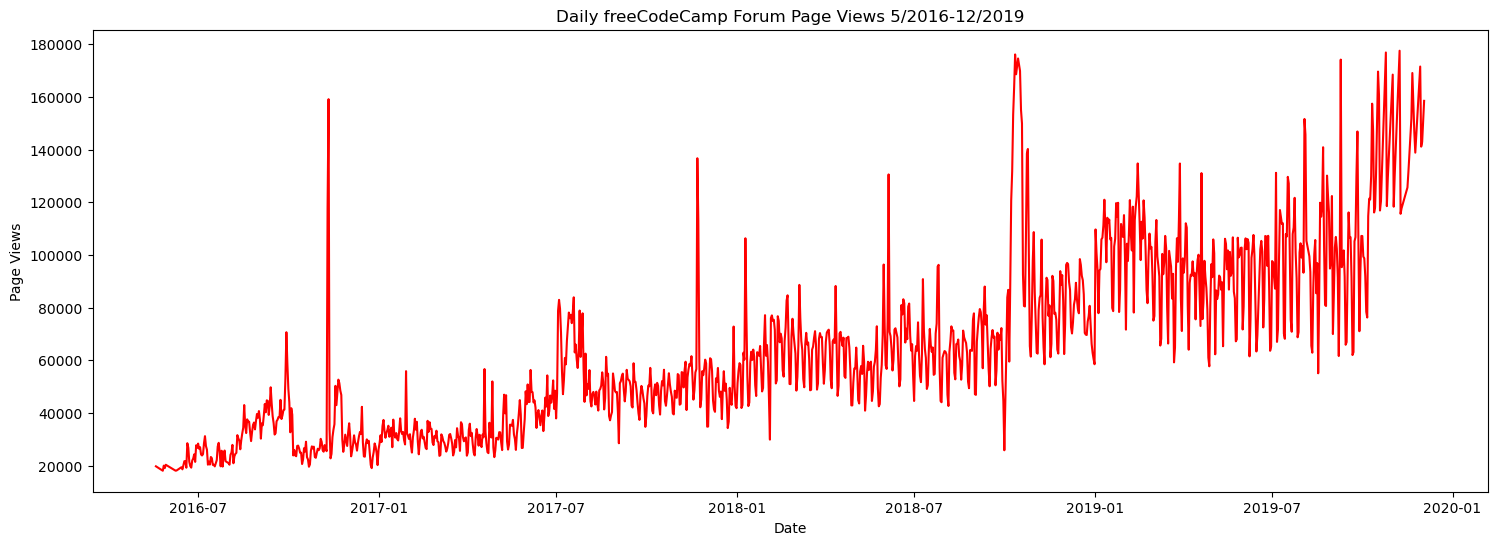

In [6]:
fig = plt.figure(figsize=(18,6))
plt.plot(df, color = 'r')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

In [51]:
df_bar = df.copy()

In [52]:
df_bar['day'] = df_bar.index.day
df_bar['Months'] = df_bar.index.month
df_bar['Years'] = df_bar.index.year

In [53]:
df_bar = df_bar.groupby(["Years", "Months"], as_index=False)['value'].mean()

In [54]:
import calendar
df_bar['Months'] = df_bar['Months'].apply(lambda x: calendar.month_name[x])

In [55]:
df_bar = pd.crosstab(df_bar['Years'], df_bar['Months'], df_bar['value'], aggfunc='first')

In [56]:
df_bar.reset_index(inplace=True)

In [57]:
df_bar

Months,Years,April,August,December,February,January,July,June,March,May,November,October,September
0,2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
1,2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2,2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
3,2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


[Text(0, 0.5, 'Average Page Views')]

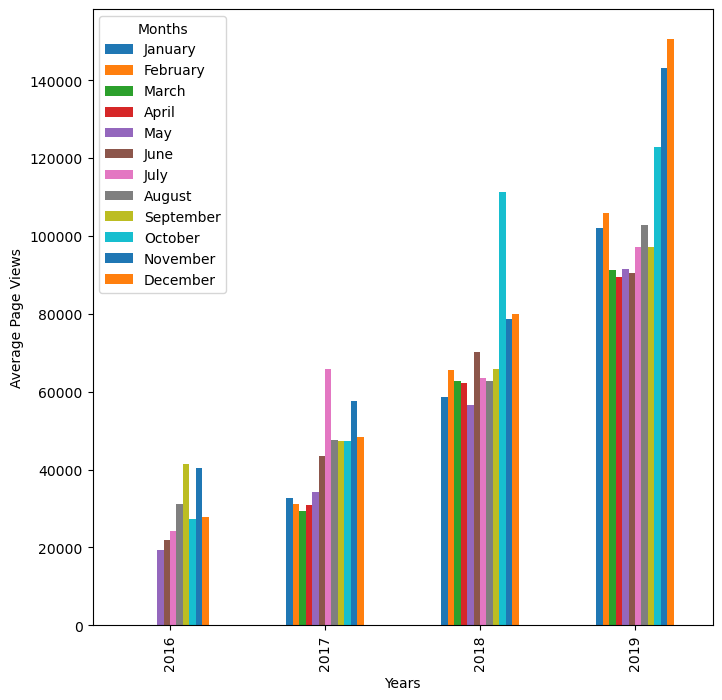

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
df_bar.plot(ax=axes, x="Years", 
            y=["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"], 
            kind="bar").set(ylabel="Average Page Views")

In [27]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [29]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0, 0.5, 'Page Views')]

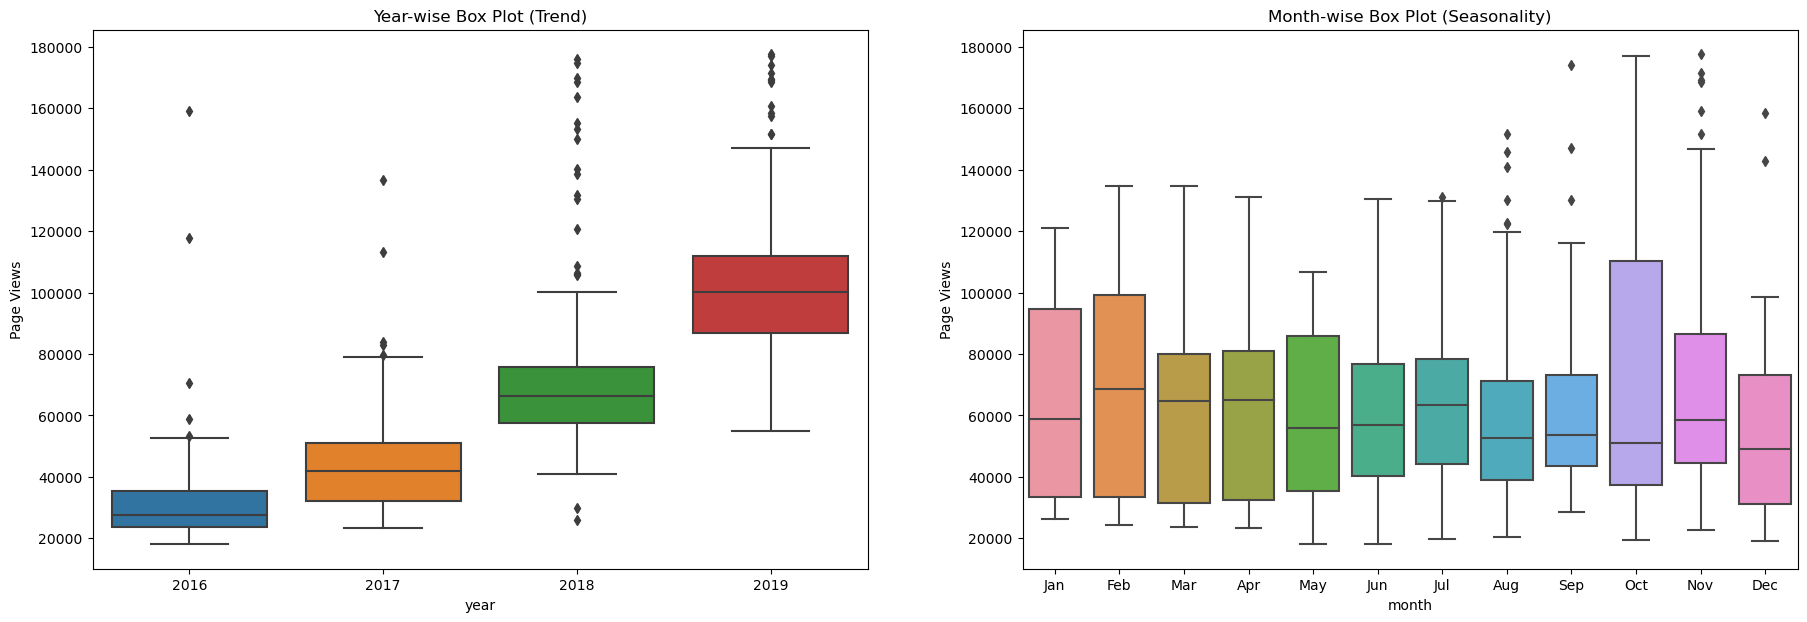

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))

sns.boxplot(x="year", y="value", data=df_box, ax=axes[0]).set(title='Year-wise Box Plot (Trend)', 
                                                              ylabel='Page Views', xlabel='Year')
sns.boxplot(x="month", y="value", data=df_box, ax=axes[1], 
            order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]).set(title='Month-wise Box Plot (Seasonality)', 
                                                                  ylabel='Page Views', xlabel='Month')

